# Titanic Notes - Rafael Cruz de Oliveira
## Descrição dos dados (titanic-data-6.csv)

|Variable	| Definition										| Key												|
|-----------|---------------------------------------------------|---------------------------------------------------|
|survival	| Survival											| 0 = No, 1 = Yes									|
|pclass		| Ticket class										| 1 = 1st, 2 = 2nd, 3 = 3rd							|
|sex		| Sex	                                        	|                                                   |
|Age		| Age in years	                                	|                                                   |
|sibsp		| # of siblings / spouses aboard the Titanic		|                                                   |
|parch		| # of parents / children aboard the Titanic		|                                                   |
|ticket		| Ticket number	                                	|                                                   |
|fare		| Passenger fare	                            	|                                                   |
|cabin		| Cabin number	                                	|                                                   |
|embarked	| Port of Embarkation								| C = Cherbourg, Q = Queenstown, S = Southampton    |
Fonte: https://www.kaggle.com/c/titanic/data

### Questões:
1. Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?
2. Existe relação entre sobrevivência e poder aquisitivo?

# Primeiras análises

In [181]:
import pandas as pd
import numpy as np
% matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')

df_titanic.info()

print('Algumas linhas não possuem o campo Age preenchido, podemos utilizar a média para preenche-los.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
Algumas linhas não possuem o campo Age preenchido, podemos utilizar a média para preenche-los.


# Clean

In [187]:
# Cria nova coluna numérica baseada em Sex.
df_titanic['Sex_Num'] = df_titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Limpar dados ausentes de idade utilizando a média.
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

# Cria nova coluna descritiva baseada em Survived.
df_titanic['Live_Die'] = df_titanic['Survived'].apply(lambda x: 'Live' if x == 1 else 'Die')

df_titanic.info()

print('Existem {} linhas duplicadas.'.format(sum(df_titanic.duplicated())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Sex_Num        891 non-null int64
Live_Die       891 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB
Existem 0 linhas duplicadas.


## Pontos da limpeza
* Algumas linhas não possuem o campo **Age** preenchido, podemos utilizar a média para preenche-los.
* **Não** existes linhas duplicadas.
* Novas colunas:
    * **Sex**: [numérica] para utilizar na correlação
    * **Live_Die**: [descritiva] para utilizar nos gráficos


# Explore

In [98]:
df_titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Num
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333
Sex_Num,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000


<img src="images/Correlação.png" alt="Nível de correlação" title="Nível de Correlação"/>

> De acordo com o gráfico acima as seguintes variáveis possuem correlação:
* **Survived**: _Sex_ e _Pclass_
* **Pclass**:   _Fare_ e _Age_

Vamos definir uma função para auxiliar nos gráficos.

In [182]:
def plot(df, kind, title, figsize=None, xlabel=None, ylabel=None):
    '''
    Função para criar um gráfico:
        Mostre as 20 primeiras amostras (linhas) da base de dados
	Argumentos:
        df: Data Frame.
        kind: Tipo do gráfico (pie, bar, hist, scatter).
        title: Título do gráfico.
        figsize: Tamanho da figura
    '''
    ax = df.plot(kind=kind, title=title, figsize=figsize)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

Do total de passageiros 26.15% dos sobreviventes eram mulheres, sendo 10.21% mulheres da primeira classe


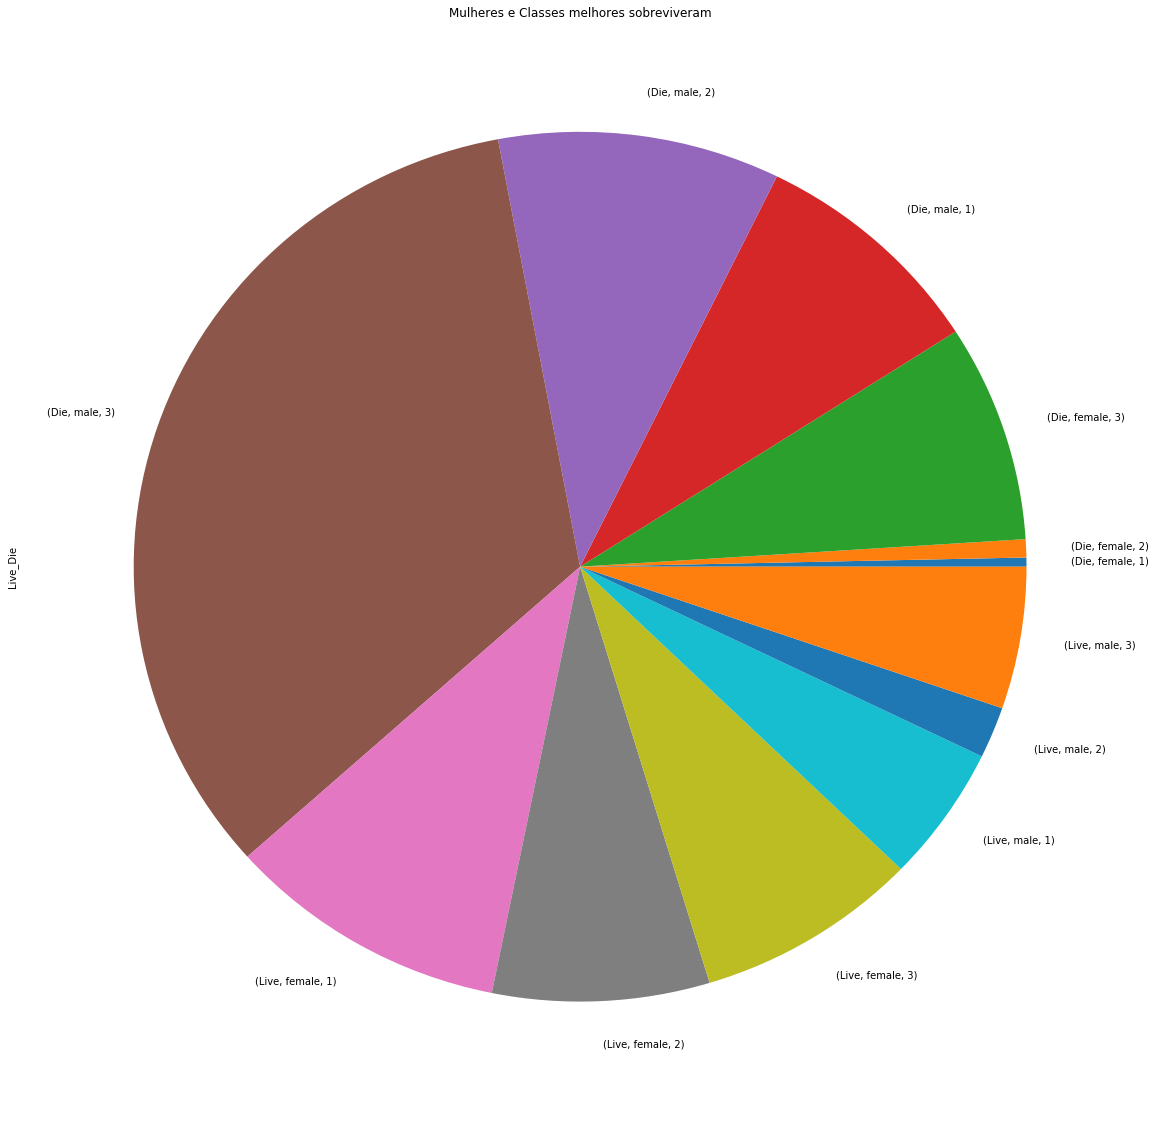

In [145]:
# Com o gráfico abaixo podemos ver que mulheres e classes melhores tiveram mais chances de sobreviver
plot(df_titanic.groupby(['Live_Die', 'Sex', 'Pclass'])['Live_Die'].count(), 
     'pie', 
     'Mulheres e Classes melhores sobreviveram',
     (20,20))

# Define a porcentagem dos sobreviventes mulheres de primeira classe.
df_titanic.groupby(['Live_Die', 'Sex', 'Pclass'])['Live_Die'].count() / df_titanic['Live_Die'].count()

print('Do total de passageiros {:.2%} dos sobreviventes eram mulheres, sendo {:.2%} mulheres da primeira classe'
      .format(df_titanic.query('Survived == 1 and Sex == "female"')['Sex'].count() / df_titanic['Sex'].count(),
             df_titanic.query('Survived == 1 and Sex == "female" and Pclass == 1')['Sex'].count() / df_titanic['Sex'].count()))




### O gráfico acima mostra a quantidade de sobreviventes.
* Maior quantidade de sobreviventes
  * Mulheres 
  * Classes melhores.

O preço pago por passageiros da primeira classe é em média 4.1 vezes maior que os da segunda.


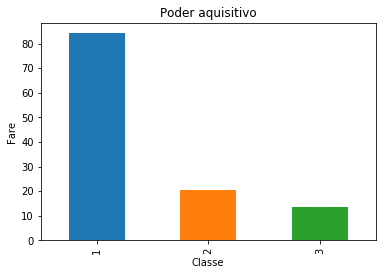

In [185]:
plot(df_titanic.groupby('Pclass')['Fare'].mean(),
    'bar',
    'Poder aquisitivo',
    None,
    'Classe',
    'Fare')

print('O preço pago por passageiros da primeira classe é em média {:.2} vezes maior que os da segunda.'
      .format(df_titanic.query('Pclass == 1')['Fare'].mean() / df_titanic.query('Pclass == 2')['Fare'].mean()))

Há uma relação proporcional entre idade e a classe do passageiro


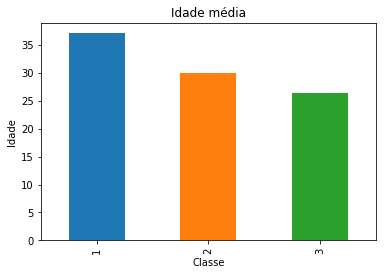

In [189]:
plot(df_titanic.groupby('Pclass')['Age'].mean(),
    'bar',
    'Idade média',
    None,
    'Classe',
    'Idade')

print('Há uma relação proporcional entre idade e a classe do passageiro')

* A média de idade da primeira classe é maior, curiosamente.

# Conclusões
1. Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?
> Sexo feminino e primeira classe foram decisivos na sobrevivência.
2. Existe relação entre sobrevivência e poder aquisitivo?
> Pessoas da primeira classe possuíam poder aquisitivo maior. Mas podem ter levado vantagem por serem, em média, mais velhas.

## Limitações
* Alguns dados não foram preenchidos, como **Age**, **Cabin** e **Embarked**. 
> * Age: Preenchi os valores ausentes com a média.
> * Cabin e Embarked: Não foram utilizados na análise
* A representação de algumas características foram ajustadas para facilitar o processo de análise. Alterou-se o tipo de sexo para um representação numérica inteira, e o tipo Survived para texto.